In [5]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue
import time
import random
import numba
import json

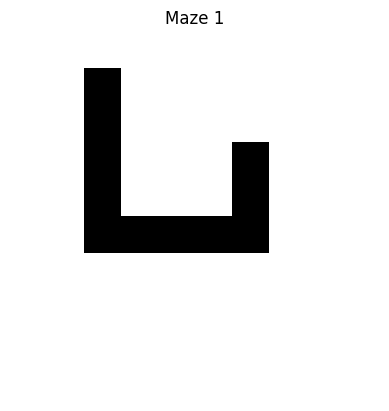

In [24]:
# Maze 1

rows, cols = 10, 10
start_1 = (0, 0)
goal_1 = (9, 9)
obstacles = [(1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (4, 6), (3, 6)]
maze_1 = create_maze(rows, cols, obstacles)

visualize_maze(maze= maze_1, title= 'Maze 1')

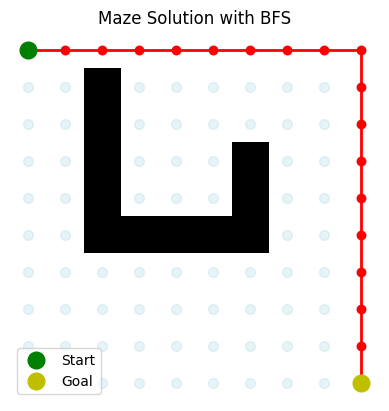

BFS: Time = 0.0023s, Nodes Expanded = 89, Path Length = 19


In [31]:
# Run BFS

start_time = time.time()
bfs_path_1, bfs_explored_1, bfs_nodes_expanded_1 = bfs(maze_1, start_1, goal_1)
bfs_time_1 = time.time() - start_time

# Visualize the result
visualize_maze_bfs(maze_1, start_1, goal_1, bfs_path_1, bfs_explored_1)

print(f"BFS: Time = {bfs_time_1:.4f}s, Nodes Expanded = {bfs_nodes_expanded_1}, Path Length = {len(bfs_path_1) if bfs_path_1 else 'N/A'}")

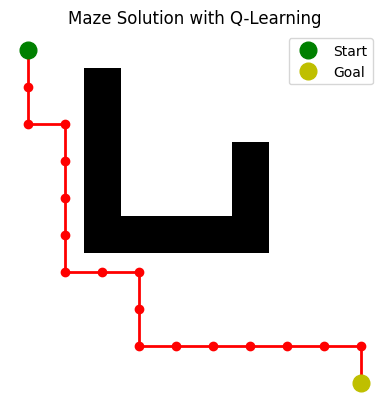

Q-Learning: Time = 0.0143s, Epochs = 9999, Path Length = 19


In [44]:
# Run Q-Learning

start_time = time.time()
q_table_1, epoch_1 = q_learning(maze_1, start_1, goal_1)
q_path_1 = get_path(q_table_1, start_1, goal_1)
q_time_1 = time.time() - start_time

visualize_maze_qlearning(maze_1, start_1, goal_1, q_path_1)

print(f"Q-Learning: Time = {q_time_1:.4f}s, Epochs = {epoch_1}, Path Length = {len(q_path_1) if q_path_1 else 'N/A'}")


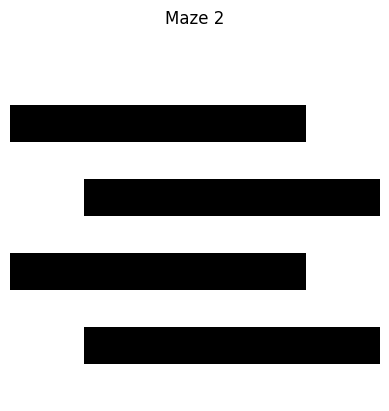

In [27]:
# Maze 2: Zigzag Maze
rows, cols = 10, 10
start_2 = (0, 0)
goal_2 = (9, 9)
obstacles = [(2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,7),
             (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8), (4,9),
             (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7),
             (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), (8,9)]
maze_2 = create_maze(rows, cols, obstacles)
visualize_maze(maze_2, 'Maze 2')

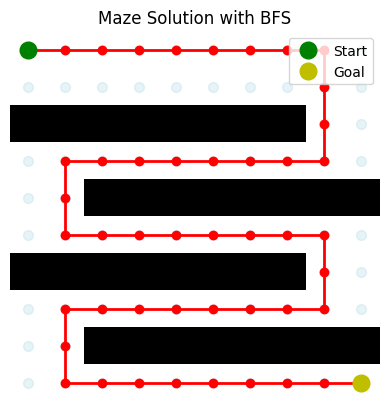

BFS: Time = 0.0008s, Nodes Expanded = 68, Path Length = 47


In [32]:
# Run BFS

start_time = time.time()
bfs_path_2, bfs_explored_2, bfs_nodes_expanded_2 = bfs(maze_2, start_2, goal_2)
bfs_time_2 = time.time() - start_time

# Visualize the result
visualize_maze_bfs(maze_2, start_2, goal_2, bfs_path_2, bfs_explored_2)

print(f"BFS: Time = {bfs_time_2:.4f}s, Nodes Expanded = {bfs_nodes_expanded_2}, Path Length = {len(bfs_path_2) if bfs_path_2 else 'N/A'}")


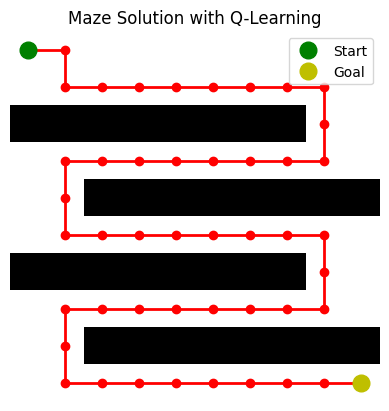

Q-Learning: Time = 0.1247s, Epochs = 9999, Path Length = 47


In [43]:
# Run Q-Learning

start_time = time.time()
q_table_2, epoch_2 = q_learning(maze_2, start_2, goal_2)
q_path_2 = get_path(q_table_2, start_2, goal_2)
q_time_2 = time.time() - start_time

visualize_maze_qlearning(maze_2, start_2, goal_2, q_path_2)

print(f"Q-Learning: Time = {q_time_2:.4f}s, Epochs = {epoch_2}, Path Length = {len(q_path_2) if q_path_2 else 'N/A'}")


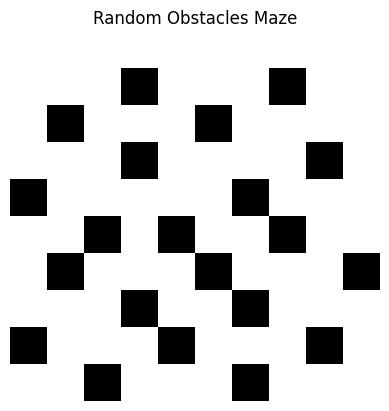

In [37]:
# Maze 3: Random Obstacles Maze

rows, cols = 10, 10
start_3 = (0, 0)
goal_3 = (9, 9)
obstacles = [(1,3), (1,7), (2,1), (2,5), (3,3), (3,8), (4,0), (4,6),
             (5,2), (5,4), (5,7), (6,1), (6,5), (6,9), (7,3), (7,6),
             (8,0), (8,4), (8,8), (9,2), (9,6)]
maze_3 = create_maze(rows, cols, obstacles)
visualize_maze(maze_3, 'Random Obstacles Maze')

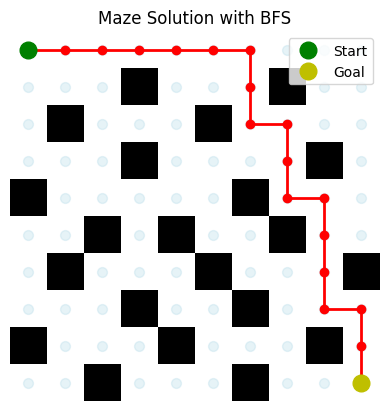

BFS: Time = 0.0010s, Nodes Expanded = 79, Path Length = 19


In [38]:
# Run BFS

start_time = time.time()
bfs_path_3, bfs_explored_3, bfs_nodes_expanded_3 = bfs(maze_3, start_3, goal_3)
bfs_time_3 = time.time() - start_time

# Visualize the result
visualize_maze_bfs(maze_3, start_3, goal_3, bfs_path_3, bfs_explored_3)

print(f"BFS: Time = {bfs_time_3:.4f}s, Nodes Expanded = {bfs_nodes_expanded_3}, Path Length = {len(bfs_path_3) if bfs_path_3 else 'N/A'}")


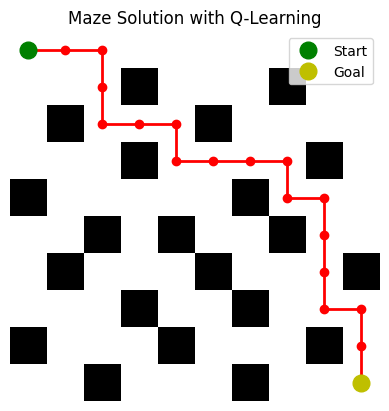

Q-Learning: Time = 0.0125s, Epochs = 9999, Path Length = 19


In [42]:
# Run Q-Learning

start_time = time.time()
q_table_3, epoch_3 = q_learning(maze_3, start_3, goal_3)
q_path_3 = get_path(q_table_3, start_3, goal_3)
q_time_3 = time.time() - start_time

visualize_maze_qlearning(maze_3, start_3, goal_3, q_path_3)

print(f"Q-Learning: Time = {q_time_3:.4f}s, Epochs = {epoch_3}, Path Length = {len(q_path_3) if q_path_3 else 'N/A'}")


In [ ]:
# Function definitions

In [6]:

def bfs(maze, start, goal):
    """
    Perform Breadth-First Search on the maze and return the path and explored nodes.
    
    Parameters:
    maze (numpy.ndarray): 2D array representing the maze
    start (tuple): Starting position (row, col)
    goal (tuple): Goal position (row, col)
    
    Returns:
    list: Path from start to goal
    set: All explored nodes
    int: Number of nodes expanded
    """
    rows, cols = maze.shape
    queue = Queue()
    queue.put(start)
    visited = set([start])
    parent = {}
    nodes_expanded = 0
    explored = set()

    while not queue.empty():
        current = queue.get()
        nodes_expanded += 1
        explored.add(current)

        if current == goal:
            path = []
            while current in parent:
                path.append(current)
                current = parent[current]
            path.append(start)
            return path[::-1], explored, nodes_expanded

        for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:  # Right, Down, Left, Up
            nr, nc = current[0] + dr, current[1] + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr, nc] == 0 and (nr, nc) not in visited:
                queue.put((nr, nc))
                visited.add((nr, nc))
                parent[(nr, nc)] = current

    return None, explored, nodes_expanded  # No path found


In [40]:
@numba.jit(nopython=True)
def q_learning(maze, start, goal, episodes=10000, alpha=0.1, gamma=0.99, epsilon=0.1):

    """
    Perform Q-learning on the maze.

    Parameters:
    maze (numpy.ndarray): 2D array representing the maze
    start (tuple): Starting position (row, col)
    goal (tuple): Goal position (row, col)
    episodes (int): Number of episodes to run
    alpha (float): Learning rate
    gamma (float): Discount factor
    epsilon (float): Exploration rate

    Returns:
    dict: Q-table
    list: Path from start to goal
    int: Number of episodes needed to converge
    """
    
    rows, cols = maze.shape
    q_table = np.zeros((rows, cols, 4))
    actions = np.array([(0, 1), (1, 0), (0, -1), (-1, 0)])  # Right, Down, Left, Up

    for x in range(episodes):
        state = start
        while state != goal:
            if np.random.random() < epsilon:
                action = np.random.choice(4)
            else:
                action = np.argmax(q_table[state[0], state[1]])
            
            next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
            
            if 0 <= next_state[0] < rows and 0 <= next_state[1] < cols and maze[next_state] == 0:
                reward = 10 if next_state == goal else -0.1
                q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
                state = next_state
            else:
                q_table[state[0], state[1], action] += alpha * (-1 - q_table[state[0], state[1], action])

    return q_table, x

@numba.jit(nopython=True)
def get_path(q_table, start, goal):
    path = [start]
    state = start
    actions = np.array([(0, 1), (1, 0), (0, -1), (-1, 0)])  # Right, Down, Left, Up
    
    while state != goal:
        action = np.argmax(q_table[state[0], state[1]])
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
        path.append(next_state)
        state = next_state
        if len(path) > 100:  # Prevent infinite loop
            return None
    return path

In [14]:
# Visualisation function for BFS

def visualize_maze_bfs(maze, start, goal, path, explored):
    """
    Visualize the maze, path, and explored nodes.
    
    Parameters:
    maze (numpy.ndarray): 2D array representing the maze
    start (tuple): Starting position (row, col)
    goal (tuple): Goal position (row, col)
    path (list): Path from start to goal
    explored (set): Set of explored nodes
    """
    # plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap='binary')
    
    # Plot explored nodes
    explored_r, explored_c = zip(*explored)
    plt.scatter(explored_c, explored_r, color='lightblue', alpha=0.3, s=50)
    
    # Plot path
    if path:
        path_r, path_c = zip(*path)
        plt.plot(path_c, path_r, color='red', linewidth=2, marker='o', markersize=6)
    
    # Mark start and goal
    plt.plot(start[1], start[0], 'go', markersize=12, label='Start')
    plt.plot(goal[1], goal[0], 'yo', markersize=12, label='Goal')

    plt.legend()
    plt.title('Maze Solution with BFS')
    plt.axis('off')
    plt.show()

In [15]:
# Visualisation function for Q-Learning

def visualize_maze_qlearning(maze, start, goal, path):
    """
    Visualize the maze, path, and explored nodes.
    
    Parameters:
    maze (numpy.ndarray): 2D array representing the maze
    start (tuple): Starting position (row, col)
    goal (tuple): Goal position (row, col)
    path (list): Path from start to goal
    explored (set): Set of explored nodes
    """
    # plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap='binary')
    
    # Plot path
    if path:
        path_r, path_c = zip(*path)
        plt.plot(path_c, path_r, color='red', linewidth=2, marker='o', markersize=6)
    
    # Mark start and goal
    plt.plot(start[1], start[0], 'go', markersize=12, label='Start')
    plt.plot(goal[1], goal[0], 'yo', markersize=12, label='Goal')

    plt.legend()
    plt.title('Maze Solution with Q-Learning')
    plt.axis('off')
    plt.show()

In [21]:
def create_maze(rows, cols, obstacles):
    """
    Create a maze represented as a 2D numpy array.
    
    Parameters:
    rows (int): Number of rows in the maze
    cols (int): Number of columns in the maze
    obstacles (list of tuples): List of (row, col) coordinates for obstacles
    
    Returns:
    numpy.ndarray: 2D array representing the maze (0 for open path, 1 for obstacle)
    """
    maze = np.zeros((rows, cols), dtype=int)
    for obstacle in obstacles:
        maze[obstacle] = 1
    return maze

def visualize_maze(maze, title):
    plt.imshow(maze, cmap='binary')
    plt.title(title)
    plt.axis('off')
    plt.show()
